In [1]:
import datetime as datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
#cargamos todos los archivos de la pagina que se encuentren dentro de la carpeta enUso
import os
dsSell = pd.DataFrame()
for filename in os.listdir("datosCompletos/propiedades/enUso"):
    dataSet = pd.read_csv("datosCompletos/propiedades/enUso/" + filename, low_memory=False)
    dsSell = dsSell.append(dataSet)
#dsValorDolar = pd.read_csv("datosCompletos/valorDolarHistorico.csv", low_memory=False)

In [3]:
dsSell.head()

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,NaN,2012-08-08,NaN,NaN,NaN,NaN,NaN,3429308.0,NaN,http://cf-thumbs.properati.com.ar/yELs9sxKz88c...,...,NaN,NaN,http://www.properati.com.ar/9h_venta_casa_san-...,house,3.0,NaN,NaN,NaN,NaN,NaN
1,NaN,2012-08-08,NaN,NaN,850 aprox,NaN,10.0,3436077.0,NaN,http://cf-thumbs.properati.com.ar/1RXv7KDah9Yt...,...,NaN,NaN,http://www.properati.com.ar/ag_venta_departame...,apartment,3.0,NaN,NaN,102.0,NaN,NaN
2,NaN,2012-08-08,NaN,NaN,NaN,NaN,11.0,3427467.0,NaN,http://cf-thumbs.properati.com.ar/Mkt0XSfl3IEb...,...,NaN,NaN,http://www.properati.com.ar/ah_venta_departame...,apartment,3.0,NaN,NaN,73.0,NaN,NaN
3,NaN,2012-08-08,NaN,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/VBY8U6EZL4ru...,...,NaN,NaN,http://www.properati.com.ar/aj_venta_casa_vill...,house,4.0,NaN,NaN,485.0,NaN,NaN
4,NaN,2012-08-08,USD,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/WYxr8Dmu1rzj...,...,NaN,315.186246,http://www.properati.com.ar/ak_venta_casa_vill...,house,4.0,NaN,NaN,349.0,NaN,NaN


In [4]:
#Queremos quedarnos con la zona, el municipio y los que esten en CABA y GBA
def getMunicipioYZona(df, dataSet):
    df['municipio'] = df['place_with_parent_names'].apply(lambda x: x.split('|')[3])
    df['zona'] = df['place_with_parent_names'].apply(lambda x: x.split('|')[2])

    df['filtro'] = df['zona'].apply(lambda x: ((x=='Capital Federal')or(x=='Bs.As. G.B.A. Zona Norte')or(x=='Bs.As. G.B.A. Zona Sur')or(x=='Bs.As. G.B.A. Zona Oeste')))
    if(dataSet == 'train'):
        return df[df.filtro]
    else:
        return df
    

In [5]:
dsSell.columns

Index(['country_name', 'created_on', 'currency', 'description', 'expenses',
       'extra', 'floor', 'geonames_id', 'id', 'image_thumbnail', 'lat',
       'lat-lon', 'lon', 'operation', 'place_name', 'place_with_parent_names',
       'price', 'price_aprox_local_currency', 'price_aprox_usd',
       'price_per_m2', 'price_usd_per_m2', 'properati_url', 'property_type',
       'rooms', 'state_name', 'surface_covered_in_m2', 'surface_in_m2',
       'surface_total_in_m2', 'title'],
      dtype='object')

In [6]:
#Como nos importa mucho el precio con respecto a otras cosas vamos a sacar a los que tienen esa columna en NaN
def filtrarPrecioNulo(df):
    df['tiene_precio'] = df['price_aprox_usd'].apply(lambda x: pd.notnull(x))
    return df[df.tiene_precio]

In [7]:
#convertimos el formato de la fecha
def formatearFecha(df):
    #df['year'] =pd.to_numeric(df['created_on'].map( lambda x: x.split('-')[0]))
    #df['month'] = pd.to_numeric(df['created_on'].map( lambda x: x.split('-')[1]))
    df['created_on'] = df['created_on'] .map(lambda x: x.split('-')[0]+x.split('-')[1]+x.split('-')[2])


In [8]:
def getInfoFromDescription(df):
    df['cochera'] = df.description.str.contains('cochera')
    df['pileta'] = df.description.str.contains('pileta')
    df['sum'] = df.description.str.contains('sum')
    df['aire acondicionado'] = df.description.str.contains('aire acondicionado')
    df['calefaccion'] = df.description.str.contains('calefaccion')
    df['seguridad'] = df.description.str.contains('seguridad')
    df['estrenar'] = df.description.str.contains('estrenar')
    df['emprendimiento'] = df.description.str.contains('emprendimiento')

    #convertimos los valores false , true y nan de las busquedas anteriores

    df['cochera'] = df['cochera'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    df['pileta'] = df['pileta'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    df['sum'] = df['sum'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    df['aire acondicionado'] = df['aire acondicionado'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    df['calefaccion'] = df['calefaccion'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    df['seguridad'] = df['seguridad'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    df['estrenar'] = df['estrenar'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    df['emprendimiento'] = df['emprendimiento'].map(lambda x: 0 if x == 'False' else 1 if x == 'True' else 0.5)
    

In [9]:
def getPrecioPorMetroCuadradoPorZona(df,df2, columna):
    df.drop('price_usd_per_m2', axis=1, inplace=True)
    return pd.merge(df, df2, on=columna)
    

In [10]:
def getPrecioPorZona(df,df2, columna):
    return pd.merge(df, df2, on=columna)

In [11]:
#pasar todas las superficies de surface_in_m2 a total_surface_in_m2
def estandarizarCampoSuperfice(df):
    mask = (df['surface_total_in_m2'].isnull())
    df['surface_total_in_m2'][mask] = df['surface_in_m2'][mask]
    mask = (df['surface_covered_in_m2'].isnull())
    df['surface_covered_in_m2'][mask] = df['surface_in_m2'][mask]

In [12]:
#drop de columnas
def dropColumnas(df):
    df.drop('price_per_m2', axis = 1, inplace = True)
    df.drop('place_with_parent_names', axis = 1, inplace = True)
    
   
    df.drop('currency', axis=1, inplace=True)
    df.drop('extra', axis=1, inplace=True)
    df.drop('id', axis=1, inplace=True)
    df.drop('image_thumbnail', axis=1, inplace=True)
    df.drop('properati_url', axis=1, inplace=True)
    df.drop('title', axis=1, inplace=True)
    df.drop('lat-lon', axis=1, inplace=True)
    df.drop('operation', axis=1, inplace=True)
    df.drop('price', axis=1, inplace=True)
    df.drop('price_aprox_local_currency', axis=1, inplace=True)
    df.drop('country_name', axis=1, inplace=True)
    df.drop('place_name', axis=1, inplace=True)
    df.drop('state_name', axis=1, inplace=True)
    df.drop('geonames_id', axis=1, inplace=True)
    df.drop('surface_in_m2', axis=1, inplace=True)
    df.drop('filtro', axis=1, inplace=True)
    df.drop('tiene_precio', axis=1, inplace=True)
    
    
    
    df.drop('description', axis = 1, inplace = True)
    #df.drop('created_on', axis = 1, inplace = True)
    df.drop('zona', axis=1, inplace=True)

In [13]:
#preprocessing

def preprocesamientoExpensas(df):
    #eliminamos todo lo q no es numero de expenses
    df['expenses'] = df['expenses'].str.extract('(\d+)')
    #convertimos a float

    df['expenses'] =pd.to_numeric(df.expenses, errors='coerce').notnull()
    

In [14]:
#one hot encoding de los place name. me suena mal muchas columnas. performance
def oneHotEncoding(df, columna):
  
    one_hot = pd.get_dummies(df[columna])
    df.drop(columna, axis=1, inplace=True)
    df = pd.concat([df, one_hot], axis=1)
    return df
    

In [15]:
#convertir lat, long a coordenadas x,y 


def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [16]:
def calcularEstaciones(reg):
    cantidad = 0
    for index, estacion in estacionesSubte.iterrows():
        cantidad = cantidad + 1 if (haversine_np(reg[3], reg[2],estacion['X'], estacion['Y'])) < 0.4 else 0
    
    return cantidad
        

In [17]:
#cargamos los datos de las localizaciones de transporte y agregamos a dataset (por ahora solo cuenta la cantidad de estaciones)
#datos sacados de data.buenosaires.gob.ar

estacionesSubte = pd.read_csv("datosCompletos/transporte/estacionesSubte.csv", low_memory=False, encoding = 'ISO-8859-1')
estacionesTren = pd.read_csv("datosCompletos/transporte/estacionesTren.csv", low_memory=False,sep = ';')
def cargarLocalizacionesTransporte(df):
    df['cantidadSubtes'] = 0
    df['cantidadTrenes'] = 0
    cantidadEstacionesSubte = df.apply(lambda x:calcularEstaciones(x), axis = 1)
    df['cantidadSubtes'] = cantidadEstacionesSubte

In [18]:
def fillFloor(df):
    df[df['floor'].isnull()]['floor'] = 0
    return df

In [19]:
#filleamos los nan con el promedio de las columnas
def fillNan(df):
    return df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [20]:
def redondearValores(df):
    df.rooms = df.rooms.round()
    df.floor = df.floor.round()

In [21]:
dsSell = getMunicipioYZona(dsSell, 'train')
dsSell = filtrarPrecioNulo(dsSell)
formatearFecha(dsSell)

In [22]:
columna = 'municipio'
dfMetrosCuadradosPorZona = dsSell.groupby(columna).mean().reset_index()[[columna,'price_usd_per_m2']]
dfPreciosPorZona = dsSell.groupby(columna).mean().reset_index()[[columna,'price_aprox_usd']]
dfPreciosPorZona = dfPreciosPorZona.rename(index=str, columns = {'price_aprox_usd' : 'price_per_zona_usd'})
dsSell = getPrecioPorZona(dsSell, dfPreciosPorZona , columna)
dsSell = getPrecioPorMetroCuadradoPorZona(dsSell, dfMetrosCuadradosPorZona, columna)


In [23]:
dsSell.created_on = dsSell.created_on.astype(float)

In [24]:
#getInfoFromDescription(dsSell)
estandarizarCampoSuperfice(dsSell)



M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
dropColumnas(dsSell)
preprocesamientoExpensas(dsSell)
dsSell = oneHotEncoding(dsSell, 'municipio')
dsSell = oneHotEncoding(dsSell, 'property_type')
dsSell = fillFloor(dsSell)
dsSell = fillNan(dsSell)
redondearValores(dsSell)
#cargarLocalizacionesTransporte(dsSell)

M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [26]:
#creamos un set de test y otro de entrenamiento. el test de entrenamiento sera de un 10% del original 

dsSell['is_true'] = np.random.uniform(0,1,len(dsSell)) >= 0.15
dsSellTrain, dsSellTest = dsSell[dsSell['is_true']==True], dsSell[dsSell['is_true']==False] 
del dsSell['is_true']
del dsSellTrain['is_true']
del dsSellTest['is_true']


dsSellTrain_y = dsSellTrain['price_aprox_usd']
dsSellTrain_x = dsSellTrain.drop('price_aprox_usd', axis=1)
dsSellTest_y = dsSellTest['price_aprox_usd']
dsSellTest_x = dsSellTest.drop('price_aprox_usd', axis=1)
columnas = dsSellTrain_x.columns.tolist()

In [27]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from stop_words import get_stop_words

#sw = get_stop_words('spanish')

# Build a BOW model for 
#dsSell.dropna(subset=['descripcion'],inplace=True)
#dsSell.description = dsSell.description.fillna('')


#v = TfidfVectorizer(stop_words= sw)
#x = v.fit_transform(dsSell['description'])

In [28]:
#import time
#from sklearn.cluster import KMeans
#from sklearn import metrics
#t0 = time.time()
#km = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=1,
#                verbose=True)
#km.fit(x)
#print("done in %0.3fs" % (time.time() - t0))
#km.labels_


In [29]:
#dsSell['cluster'] = km.labels_
#dsSell.groupby('cluster').agg('size').sort_values(ascending=False)[0:30]

In [30]:
#dsSellTest_x['cluster'] = km.predict(dsSellTest_x[['lat', 'lon']])

#dsSellTrain_x = oneHotEncoding(dsSellTrain_x, 'cluster')
#dsSellTest_x = oneHotEncoding(dsSellTest_x, 'cluster')

In [31]:
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
modelo =1  #0: Linear Regression, 1: MLP
             
if(modelo == 0):
    model = linear_model.LinearRegression()
if(modelo == 1):
    estimators = [('StandardScaler', StandardScaler()), ('mlp',MLPRegressor())]
    model = Pipeline(estimators)
    #hidden_layer_sizes=(100,100,100,100), learning_rate = 'invscaling', max_iter = 200)
    param_grid = {
        'mlp__hidden_layer_sizes':[(50,50,50)],
        'mlp__max_iter': [10],
        'mlp__verbose': [10],
        'mlp__early_stopping' : [True],
        'mlp__alpha' : [0.00001,0.0001,0.001,0.01,0.1,1,10],
        'mlp__activation' : ['relu', 'tanh','logistic'],
        'mlp__learning_rate' : ['invscaling', 'adaptive'],
        'mlp__learning_rate_init' : [0.0001,0.001,0.1,0.01,0.00001],
        'mlp__epsilon' : [0.00000001,0.0000001,0.000000001]
    }

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
import time
mse_scorer = make_scorer( mean_squared_error, greater_is_better=False)

In [33]:
model.get_params().keys()

dict_keys(['steps', 'StandardScaler', 'mlp', 'StandardScaler__copy', 'StandardScaler__with_mean', 'StandardScaler__with_std', 'mlp__activation', 'mlp__alpha', 'mlp__batch_size', 'mlp__beta_1', 'mlp__beta_2', 'mlp__early_stopping', 'mlp__epsilon', 'mlp__hidden_layer_sizes', 'mlp__learning_rate', 'mlp__learning_rate_init', 'mlp__max_iter', 'mlp__momentum', 'mlp__nesterovs_momentum', 'mlp__power_t', 'mlp__random_state', 'mlp__shuffle', 'mlp__solver', 'mlp__tol', 'mlp__validation_fraction', 'mlp__verbose', 'mlp__warm_start'])

In [34]:
#random search del modelo elegido
from sklearn.model_selection import RandomizedSearchCV
from numpy import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

import scipy 


#print("[INFO] tuning hyperparameters via grid search")


#grid = RandomizedSearchCV(model, param_grid, n_jobs = 5,n_iter =1,  scoring=mse_scorer)



#start = time.time()
#print("[INFO] fitting stage")
#grid = grid.fit(dsSellTrain_x , dsSellTrain_y)
#acc = grid.best_score_
#model.get_params()
#print("[INFO] grid search took {:.2f} seconds".format(time.time() - start))
#print("[INFO] grid search score: {:.2f}".format(abs(acc)))
#print("[INFO] grid search best parameters: {}".format(grid.best_params_))

In [35]:
import gc
gc.collect()

7

In [36]:
#predictions = grid.predict(dsSellTest_x)
#mean_squared_error(dsSellTest_y, predictions)


In [32]:
estimators = [('StandardScaler', StandardScaler()), ('mlp',MLPRegressor(hidden_layer_sizes = (70,70,70,70,70,70,70,70), max_iter = 10, verbose = 10))]
model = Pipeline(estimators)
start = time.time()
print("[INFO] fitting stage")
model.fit(dsSellTrain_x,dsSellTrain_y)

print("[INwFO] fitting state took {:.2f} seconds".format(time.time() - start))
predictions = model.predict(dsSellTest_x)
print(mean_squared_error(dsSellTest_y, predictions))

[INFO] fitting stage
Iteration 1, loss = 47804683608.48279572
Iteration 2, loss = 47323376192.60594940
Iteration 3, loss = 40369027325.98990631
Iteration 4, loss = 38602678000.23862457
Iteration 5, loss = 37479737911.91982269
Iteration 6, loss = 38474640360.00466156
Iteration 7, loss = 35885570218.30375671
Iteration 8, loss = 37589068103.28389740
Iteration 9, loss = 35511994817.58165741
Iteration 10, loss = 34527336201.46074677


M:\Users\Krion\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[INwFO] fitting state took 1439.63 seconds
69180397845.2


In [38]:
def genSample(df):
    train = df.sample(frac = 1, replace = True)
  

    dfTrain_y = train['price_aprox_usd']
    dfTrain_x = train.drop('price_aprox_usd', axis=1)

    return dfTrain_x, dfTrain_y

In [ ]:
def genSampleAndOOB(df):
    df['is_true'] = np.random.uniform(0,1,len(df)) >= 0.05
    train, oob = df[df['is_true']==True], df[df['is_true']==False] 
    del df['is_true']
    del train['is_true']
    del oob['is_true']

    oob_y = oob['price_aprox_usd']
    oob_x = oob.drop('price_aprox_usd', axis = 1)
    
    train_x, train_y = genSample(train)
    
    return train_x, train_y, oob_x, oob_y

In [39]:
#ensamble bagging
n_models = 4
models = [0] * n_models
predictions = [] 

for i in range(n_models):
    estimators = [('StandardScaler', StandardScaler()), ('mlp',MLPRegressor(hidden_layer_sizes = (70,70,70,70,70,70), max_iter = 60, verbose = 10))]
    model = Pipeline(estimators)
    models[i] = model

for i in range(n_models):
    train_x, train_y= genSample(dsSell)
    
    start = time.time()
    print("[INFO] fitting stage for model " + str(i))
    models[i].fit(train_x,train_y)

    print("[INwFO] fitting state took {:.2f} seconds".format(time.time() - start))
    
for i in range(n_models):
    predictions.append(models[i].predict(dsSellTest_x))
    
    
dfPredictions = pd.DataFrame(predictions)
avgPrediction = dfPredictions.mean(axis=0).values      #tal vez usar  red reunoral en vez de avg



for i in range(n_models):
    print("MSE model "+str(i) +": " + str(mean_squared_error(dsSellTest_y, predictions[i])))
    
print("MSE avg: "+str(mean_squared_error(dsSellTest_y, avgPrediction)))
    
    

[INFO] fitting stage for model 0
Iteration 1, loss = 48311450114.37739563
Iteration 2, loss = 42476683283.96667480
Iteration 3, loss = 39889448883.76522827
Iteration 4, loss = 37203934683.97725677
Iteration 5, loss = 36633313402.69945526
Iteration 6, loss = 36112423952.67344666
Iteration 7, loss = 35019155416.62833405
Iteration 8, loss = 36152133376.28639984
Iteration 9, loss = 36021413465.52255249
Iteration 10, loss = 35004637887.72444916
Iteration 11, loss = 34804268637.35905457
Iteration 12, loss = 34450210351.64603424
Iteration 13, loss = 34361508260.30397797
Iteration 14, loss = 33897758680.18682098
Iteration 15, loss = 33823978567.75074768
Iteration 16, loss = 34046439640.79680252
Iteration 17, loss = 33461124366.68717575
Iteration 18, loss = 33449647960.92541504
Iteration 19, loss = 33446312786.29134750
Iteration 20, loss = 32984880226.35780716
Iteration 21, loss = 33449418349.82243347
Iteration 22, loss = 33170668107.99640274
Iteration 23, loss = 32892121014.06623077
Iteration 

In [ ]:
#ensamble bagging con OOB
n_models = 2
models = [0] * n_models
predictions = [] 
OOBmse = []

for i in range(n_models):
    estimators = [('StandardScaler', StandardScaler()), ('mlp',MLPRegressor(hidden_layer_sizes = (70,70,70,70,70,70), max_iter = 10, verbose = 10))]
    model = Pipeline(estimators)
    models[i] = model

for i in range(n_models):
    train_x, train_y, OOB_x, OOB_y = genSampleAndOOB(dsSell)
    
    start = time.time()
    print("[INFO] fitting stage for model " + str(i))
    models[i].fit(train_x,train_y)

    print("[INwFO] fitting state took {:.2f} seconds".format(time.time() - start))
    
    OOBprediction = models[i].predict(OOB_x)
    OOBmse.append(mean_squared_error(OOB_y, OOBprediction))
    
    
    
dfOOB = pd.DataFrame(OOBmse)
avgOOB = dfOOB.mean(axis=0).values  

for i in range(n_models):
    print("OOB mean squared error "+str(i) +": " + str(OOBmse[i]))
        
print("OOB MSE avg: "+str(avgOOB))

In [77]:
for i in range(n_models):
    predictions.append(models[i].predict(dsSellTest_x))
    
    
dfPredictions = pd.DataFrame(predictions)
avgPrediction = dfPredictions.mean(axis=0).values      #tal vez usar  red reunoral en vez de avg



for i in range(n_models):
    print("MSE model "+str(i) +": " + str(mean_squared_error(dsSellTest_y, predictions[i])))
    
print("MSE avg: "+str(mean_squared_error(dsSellTest_y, avgPrediction)))

MSE model 0: 83454174262.8
MSE model 1: 71778187790.0
MSE avg: 69579879267.2


In [ ]:
import multiprocessing

predictions = [] 

def fitModel():
    train_x, train_y= genSample(dsSell)
    
    start = time.time()
    print("[INFO] fitting stage for model " + str(i))
    models[i].fit(train_x,train_y)

    print("[INwFO] fitting state took {:.2f} seconds".format(time.time() - start))

def calculate_all(number):
    local_list_all = [1,2,3]
    local_result_all = all(True if i == number else False for i in local_list_all)
    global_all = local_result_all
    print("This is the second result within a process: {}".format(local_result_all))


if __name__ == "__main__":
    number = 2
    p1 = multiprocessing.Process(target = calculate_any, args = (number,))
    p2 = multiprocessing.Process(target = calculate_all, args = (number,))

    p1.start()
    p2.start()

    p1.join()
    p2.join()


In [40]:
#levantamos el set de test 
testSet = pd.read_csv("testSet.csv", low_memory=False)
testId = testSet['id']
testSet

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,-58.363464,0.0,NaN,NaN,NaN,NaN,Edificio BA Houses situado frente al Dique 3 d...
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,El departamento cuenta con un living-comedor a...
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,-58.412880,53.0,48.0,NaN,NaN,1500,IMPECABLE TORRE COY III – DEPA...
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,51.0,51.0,NaN,NaN,NaN,LIVING COMEDOR CON PISOS DE PO...
5,2263407,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...
6,2263408,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...
7,2263409,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...
8,2263410,2017-08-01,departamento,venta,Colegiales,|Argentina|Capital Federal|Colegiales|,Argentina,Capital Federal,"-34.5787213694,-58.4570952614",-34.578721,-58.457095,67.0,67.0,NaN,NaN,2600,EXCELENTE 2 AMB- APTO PROFESIO...
9,2263411,2017-08-01,departamento,venta,Almagro,|Argentina|Capital Federal|Almagro|,Argentina,Capital Federal,NaN,NaN,NaN,47.0,47.0,NaN,NaN,NaN,IMPECABLE MONOAMBIENTE- DIVISI...


In [41]:
#drop de columnas
def dropColumnasTestSet(df):
    df.drop('place_with_parent_names', axis = 1, inplace = True)
    df.drop('description', axis = 1, inplace = True)
    df.drop('id', axis=1, inplace=True)
    df.drop('lat-lon', axis=1, inplace=True)
    df.drop('operation', axis=1, inplace=True)
    df.drop('country_name', axis=1, inplace=True)
    df.drop('place_name', axis=1, inplace=True)
    df.drop('state_name', axis=1, inplace=True)
    df.drop('filtro', axis=1, inplace=True)
    
    
    
    
    
    #df.drop('created_on', axis = 1, inplace = True)
    df.drop('zona', axis=1, inplace=True)

In [42]:
#preprocesamos el set de test
testSetPreprocessed = testSet
testSetPreprocessed 

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,-58.363464,0.0,NaN,NaN,NaN,NaN,Edificio BA Houses situado frente al Dique 3 d...
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,El departamento cuenta con un living-comedor a...
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,-58.412880,53.0,48.0,NaN,NaN,1500,IMPECABLE TORRE COY III – DEPA...
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,51.0,51.0,NaN,NaN,NaN,LIVING COMEDOR CON PISOS DE PO...
5,2263407,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...
6,2263408,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...
7,2263409,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...
8,2263410,2017-08-01,departamento,venta,Colegiales,|Argentina|Capital Federal|Colegiales|,Argentina,Capital Federal,"-34.5787213694,-58.4570952614",-34.578721,-58.457095,67.0,67.0,NaN,NaN,2600,EXCELENTE 2 AMB- APTO PROFESIO...
9,2263411,2017-08-01,departamento,venta,Almagro,|Argentina|Capital Federal|Almagro|,Argentina,Capital Federal,NaN,NaN,NaN,47.0,47.0,NaN,NaN,NaN,IMPECABLE MONOAMBIENTE- DIVISI...


In [43]:
testSetPreprocessed = getMunicipioYZona(testSetPreprocessed, 'test')
formatearFecha(testSetPreprocessed)
getInfoFromDescription(testSetPreprocessed)
testSetPreprocessed = pd.merge(testSetPreprocessed ,  dfMetrosCuadradosPorZona, on=columna, how = 'left')
testSetPreprocessed = pd.merge(testSetPreprocessed ,  dfPreciosPorZona, on=columna, how = 'left')
dropColumnasTestSet(testSetPreprocessed)
preprocesamientoExpensas(testSetPreprocessed)
testSetPreprocessed = oneHotEncoding(testSetPreprocessed, 'municipio')
testSetPreprocessed = oneHotEncoding(testSetPreprocessed, 'property_type')
testSetPreprocessed = fillFloor(testSetPreprocessed)
testSetPreprocessed = fillNan(testSetPreprocessed)
redondearValores(testSetPreprocessed)

M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [44]:
testSetPreprocessed.rename(columns={'ph': 'PH', 'departamento': 'apartment',  'casa': 'house'}, inplace=True)
testSetPreprocessed['store'] = 0

In [46]:
for col in columnas:
    if col not in testSetPreprocessed:
        testSetPreprocessed[col] = 0 

In [47]:
testSetPreprocessed = testSetPreprocessed[columnas]  

In [41]:
testPrice= model.predict(testSetPreprocessed)

In [51]:
testPredictions = []
for i in range(n_models):
    testPredictions.append(models[i].predict(testSetPreprocessed ))
    
    
dfPredictions = pd.DataFrame(testPredictions)
testPrice = dfPredictions.mean(axis=0).values  

In [52]:
dataPredictions = {'id' : testId,
        'price_usd' : testPrice}
testPrediction = pd.DataFrame(dataPredictions)

In [53]:
#exportar csv con formato para kaggle
fileName = "pricePrediction.csv"
testPrediction.to_csv(fileName, sep=',', index = False)

M:\Users\Krion\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.690006
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.292149
[t-SNE] Error after 300 iterations: 1.292149


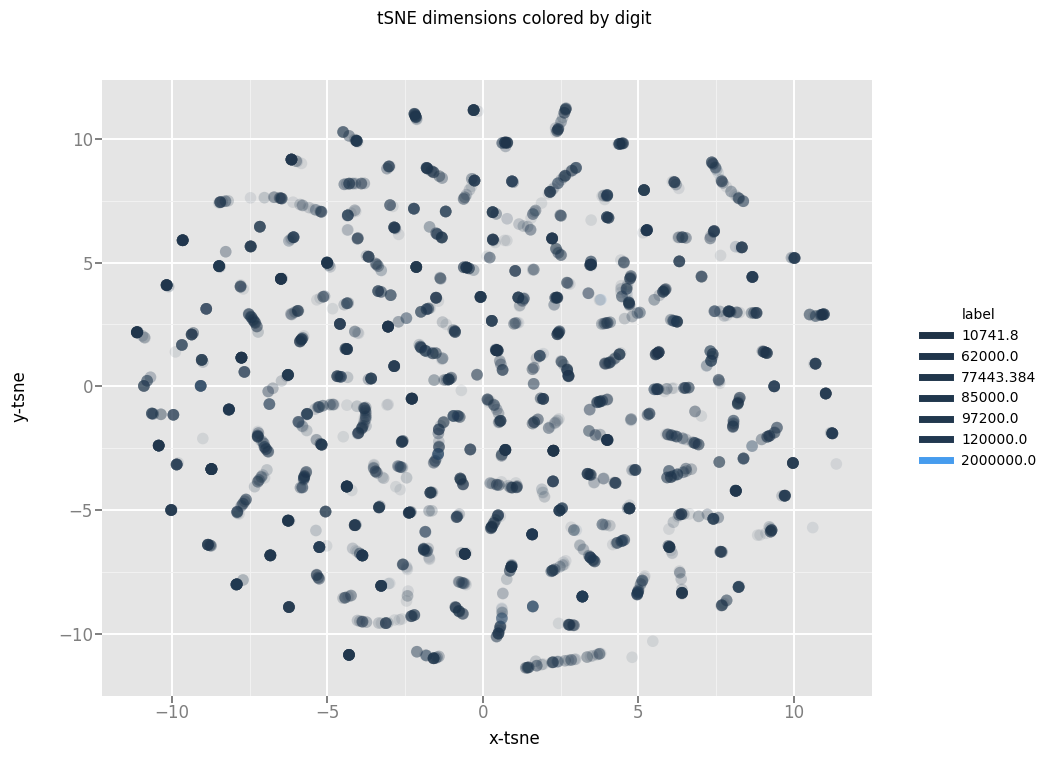

<ggplot: (-9223371922712096494)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 94 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.535124
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.271598
[t-SNE] Error after 300 iterations: 1.271598


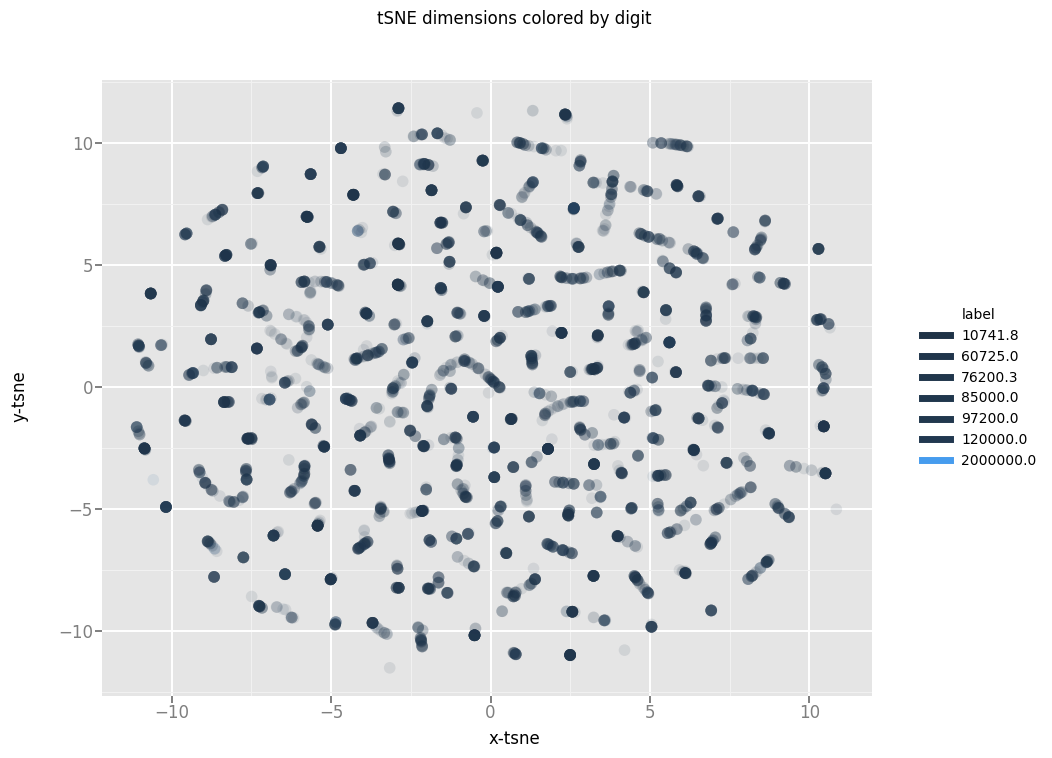

<ggplot: (114253205035)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 97 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.585456
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.250591
[t-SNE] Error after 300 iterations: 1.250591


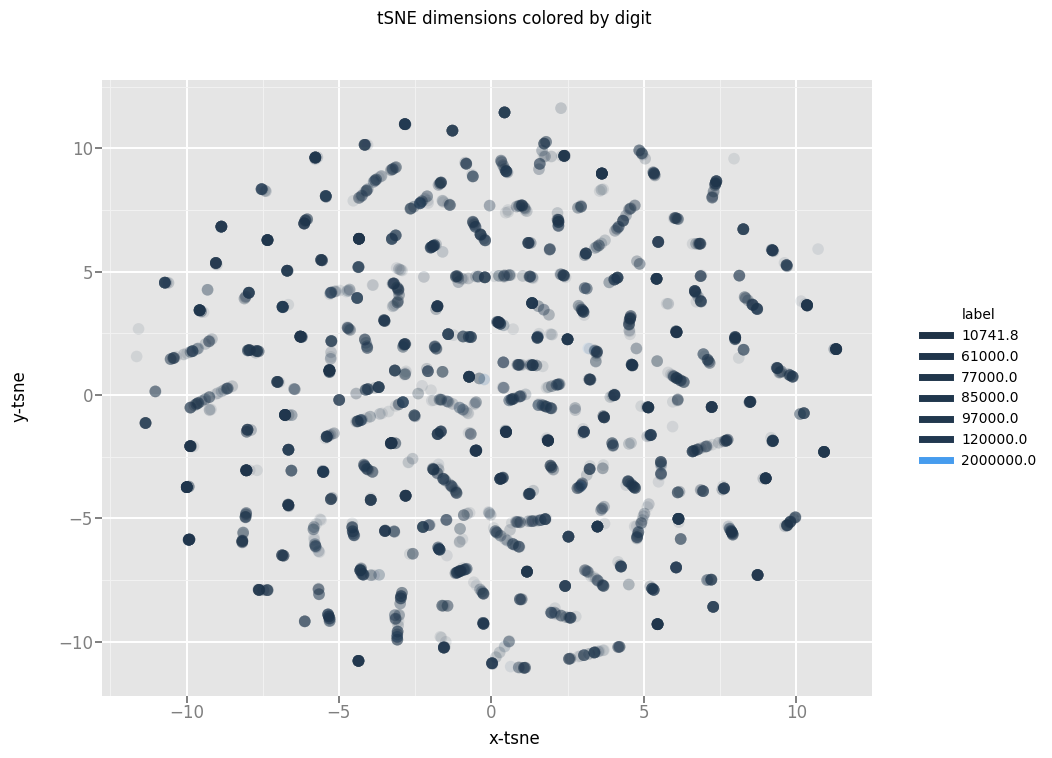

<ggplot: (-9223371922591044734)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 100 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.013083
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.230328
[t-SNE] Error after 300 iterations: 1.230328


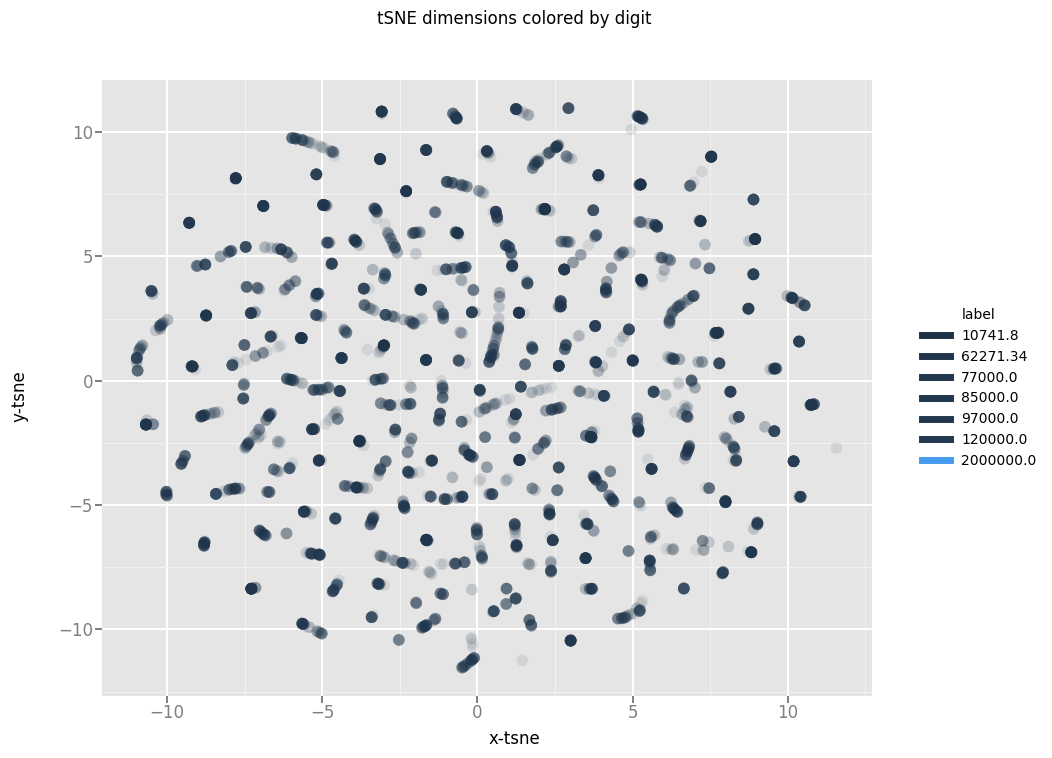

<ggplot: (114264034017)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 103 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.291154
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.212347
[t-SNE] Error after 300 iterations: 1.212347


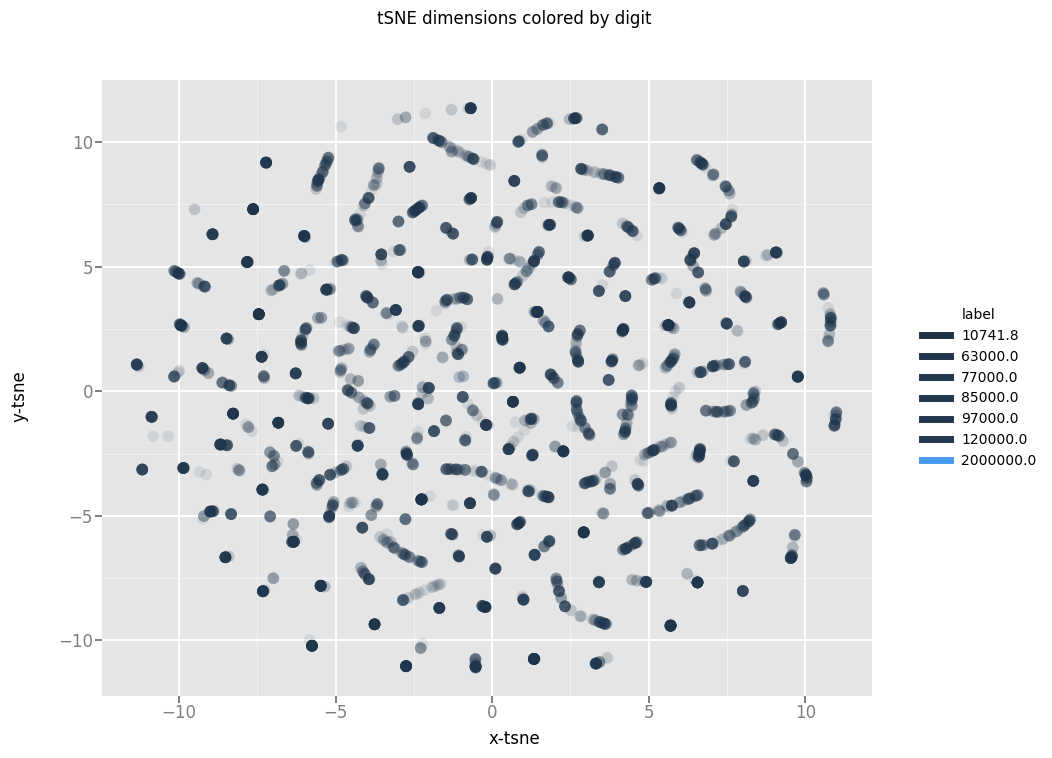

<ggplot: (114253200136)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.255682
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.192609
[t-SNE] Error after 300 iterations: 1.192609


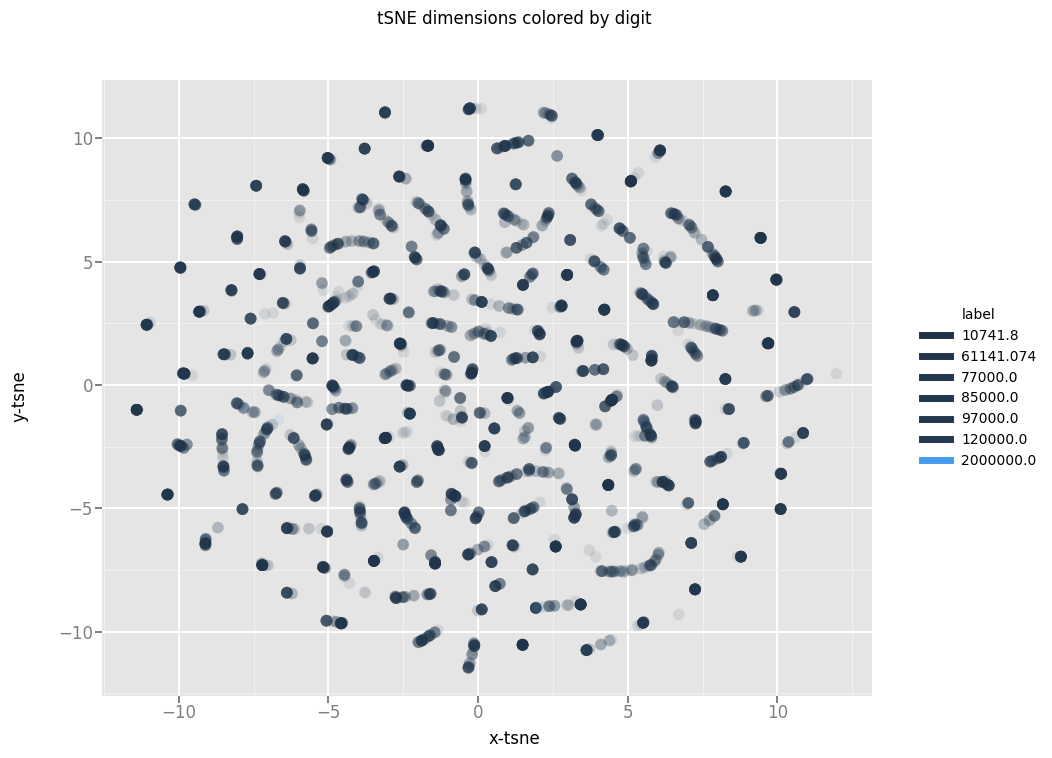

<ggplot: (114263729107)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 109 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.270212
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.174318
[t-SNE] Error after 300 iterations: 1.174318


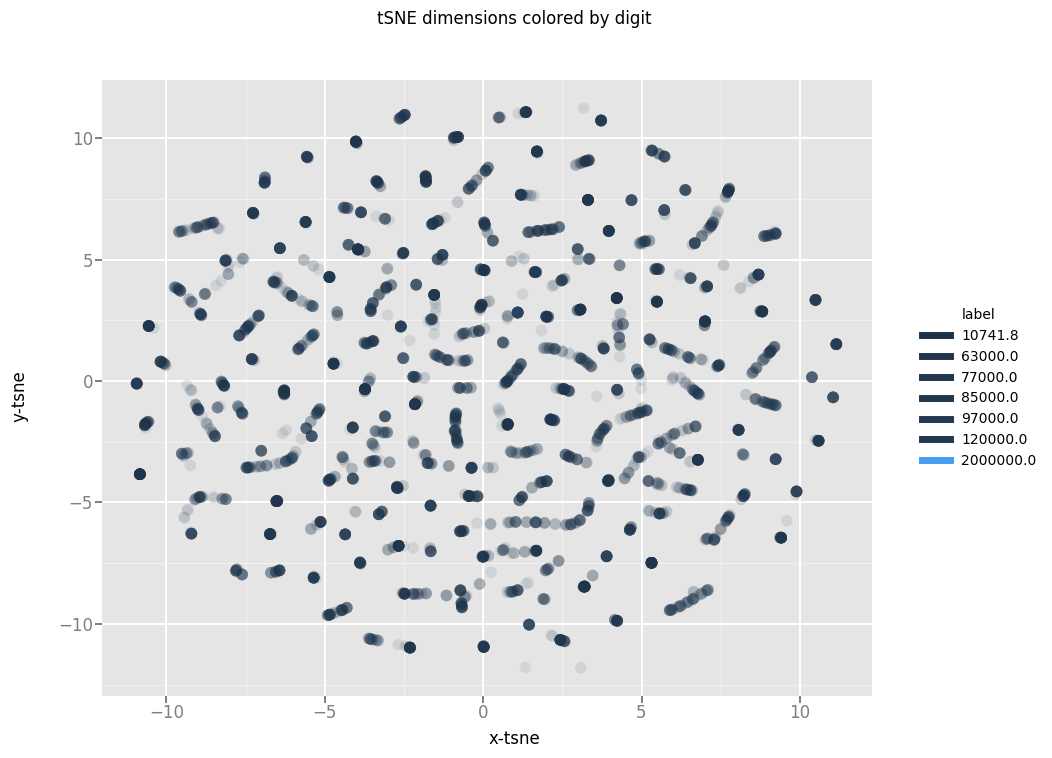

<ggplot: (-9223371922590749096)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 112 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.785557
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.160401
[t-SNE] Error after 300 iterations: 1.160401


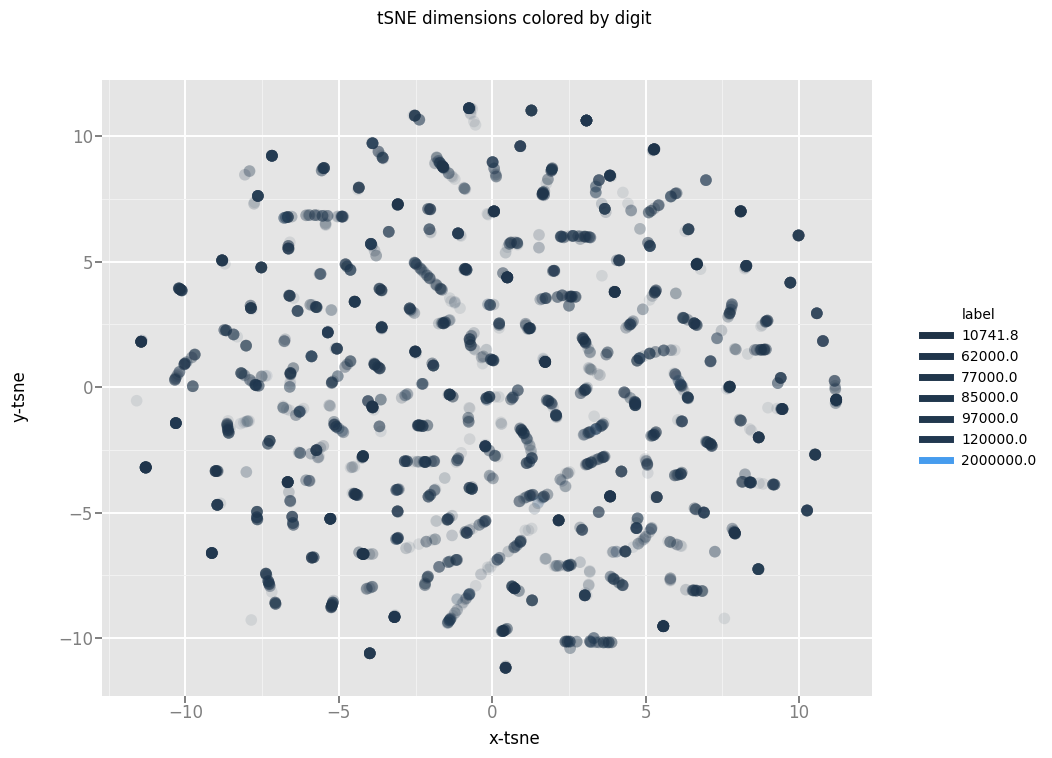

<ggplot: (-9223371922810685180)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 115 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 7.218994
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.139610
[t-SNE] Error after 300 iterations: 1.139610


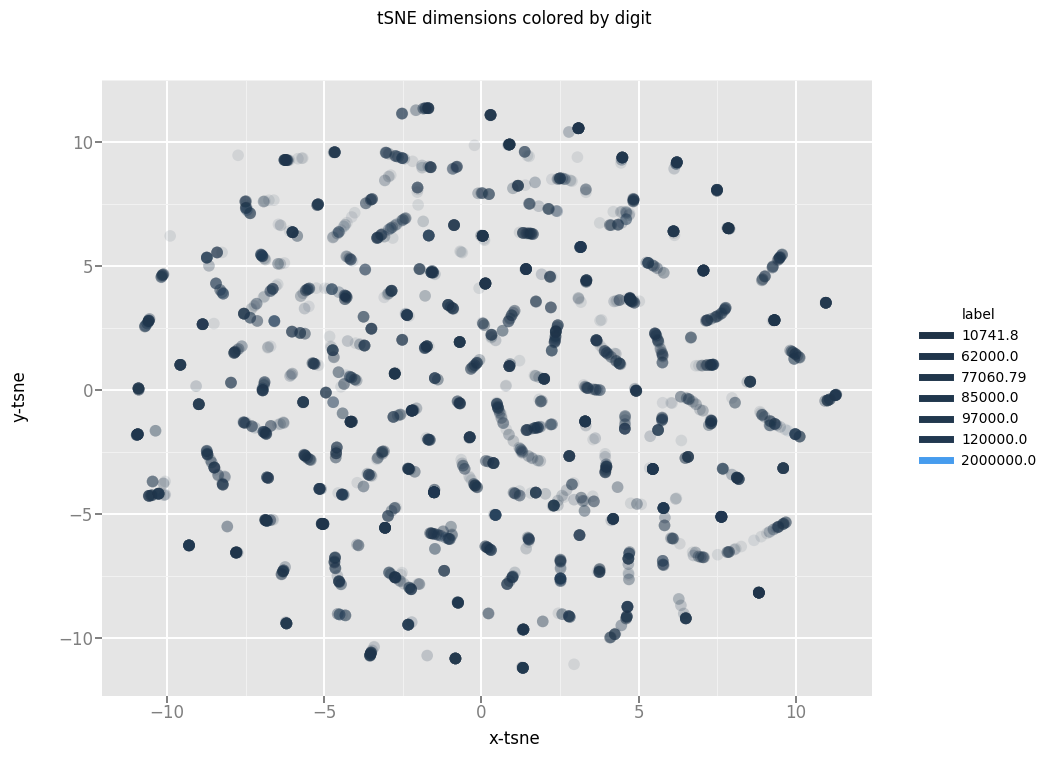

<ggplot: (114264288765)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 118 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 7.413285
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.127612
[t-SNE] Error after 300 iterations: 1.127612


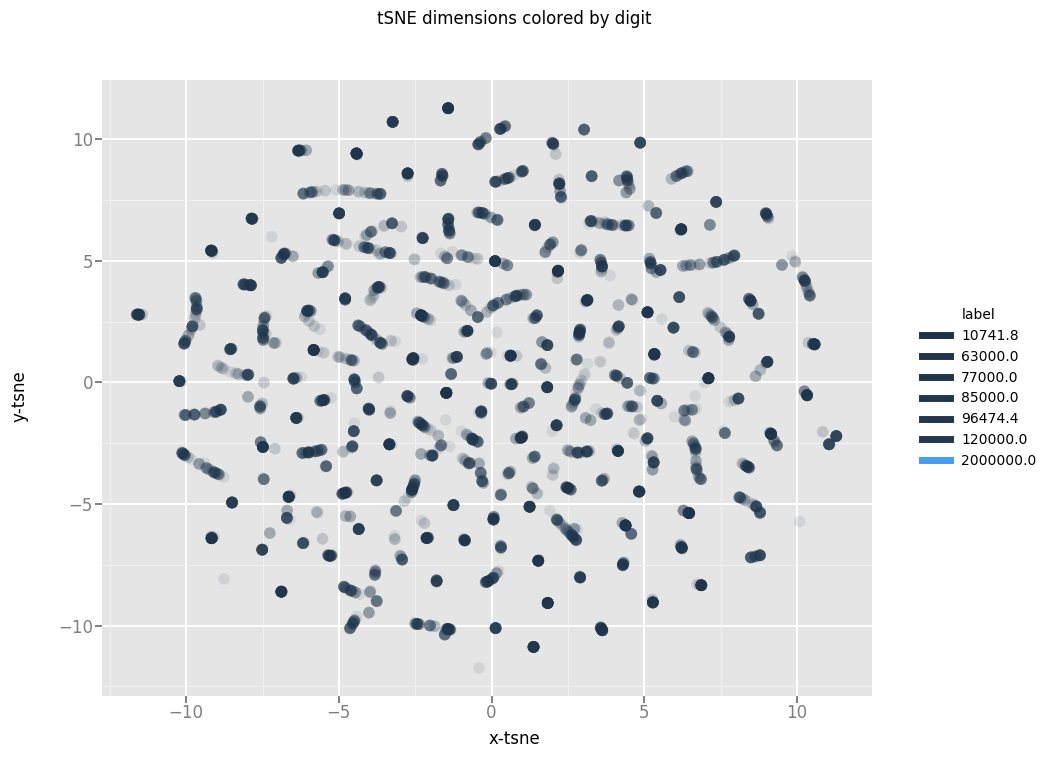

<ggplot: (114264288758)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 7.213024
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.112061
[t-SNE] Error after 300 iterations: 1.112061


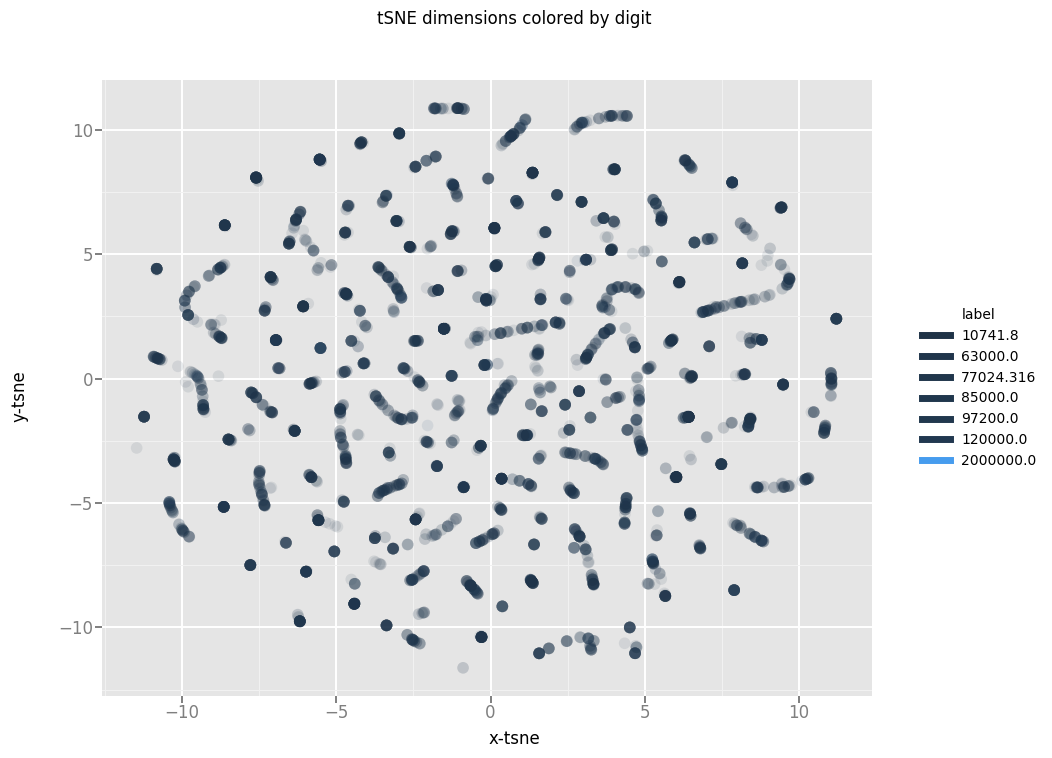

<ggplot: (-9223371922591036626)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 124 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 7.425039
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.095967
[t-SNE] Error after 300 iterations: 1.095967


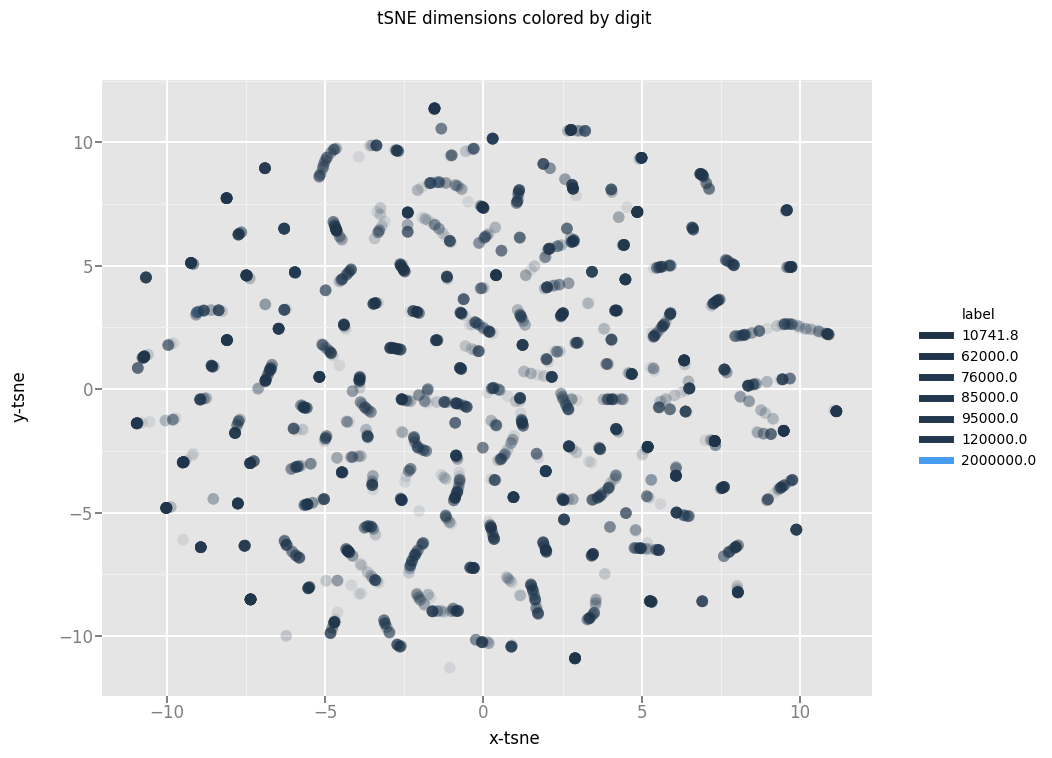

<ggplot: (114044097435)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 127 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 8.061382
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.081579
[t-SNE] Error after 300 iterations: 1.081579


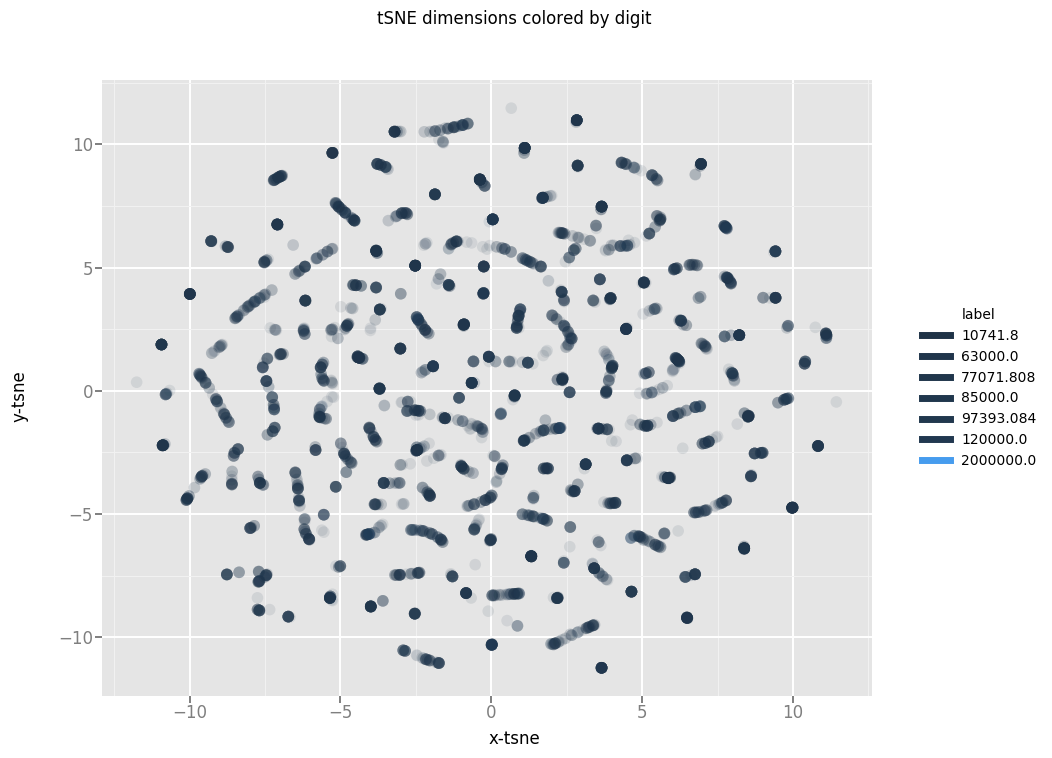

<ggplot: (114253654013)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 130 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 7.936187
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.066049
[t-SNE] Error after 300 iterations: 1.066049


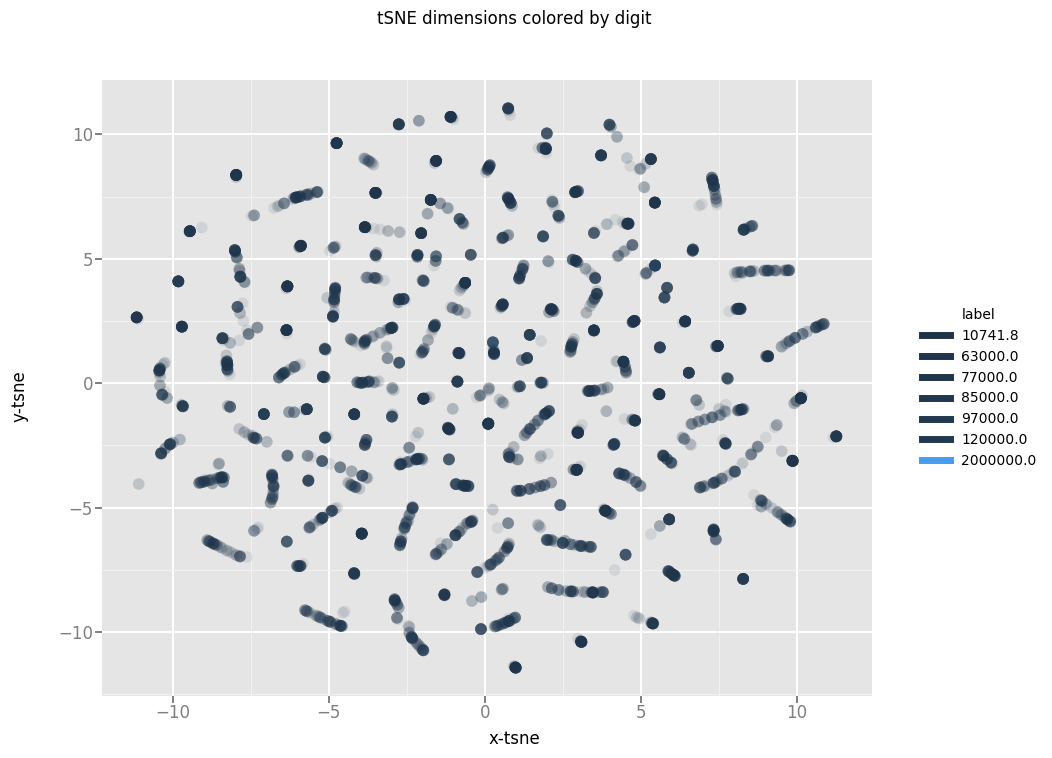

<ggplot: (114263802204)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 133 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 8.174512
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.050801
[t-SNE] Error after 300 iterations: 1.050801


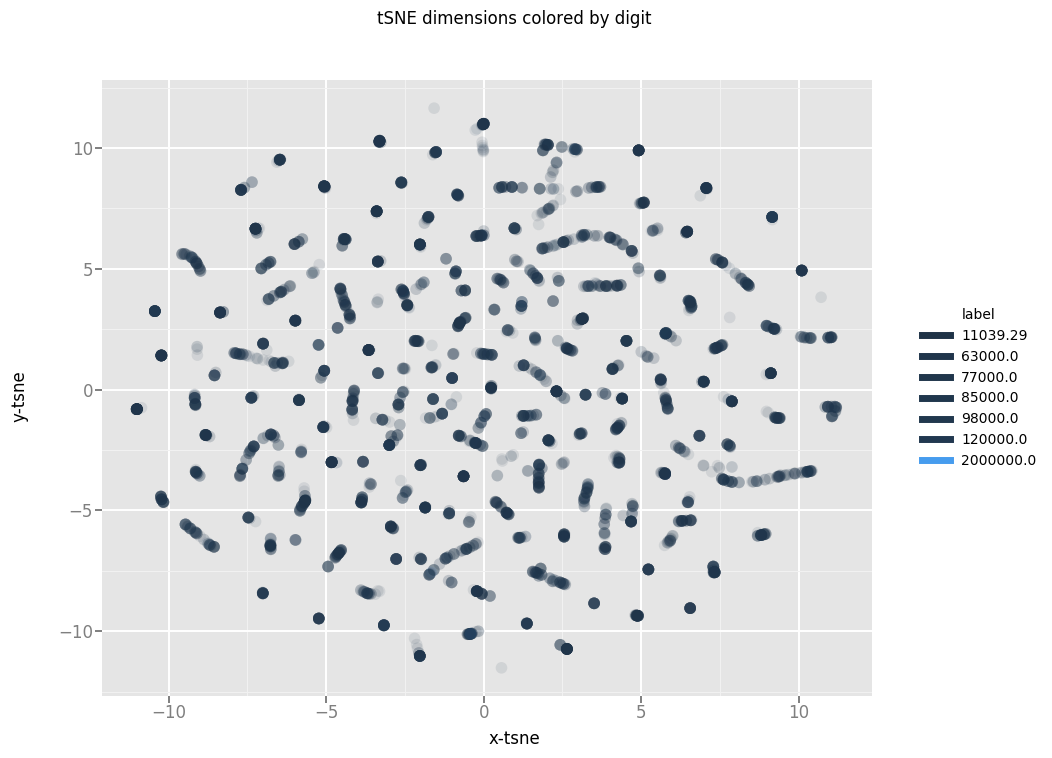

<ggplot: (-9223371922590539397)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 8.483226
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.042475
[t-SNE] Error after 300 iterations: 1.042475


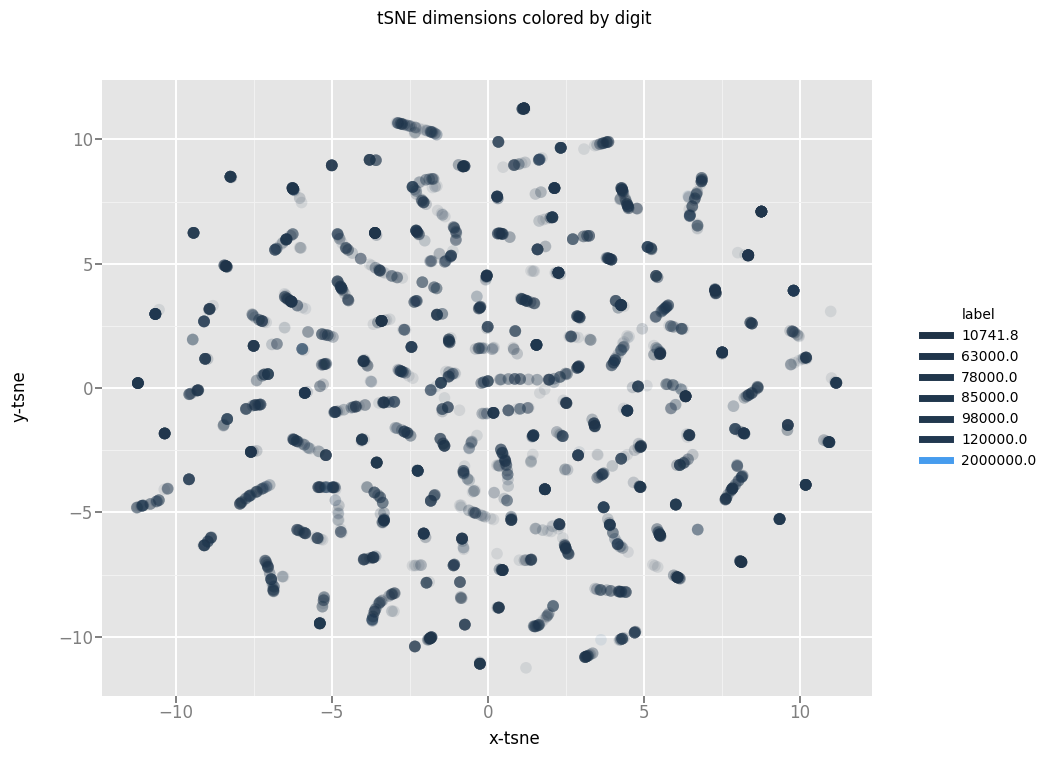

<ggplot: (114264238628)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 139 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 8.610952
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.028566
[t-SNE] Error after 300 iterations: 1.028566


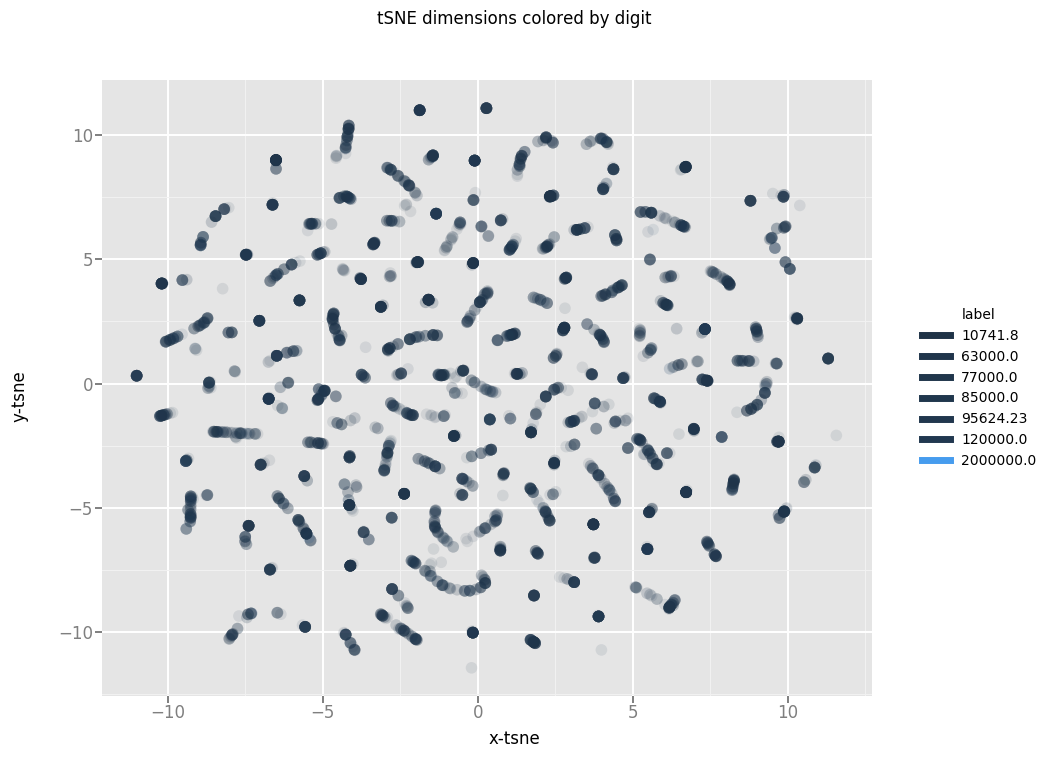

<ggplot: (114253660108)>
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 142 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 8.706641
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.011939


In [ ]:
import time
from ggplot import *
from sklearn.manifold import TSNE



for i in range(30,400):
        n = 10000
        sample = dsSellTrain.sample(n = n)
        y_data = dsSellTrain['price_aprox_usd']
        x_data = dsSellTrain.drop('price_aprox_usd', axis=1)

        dsSellTrain['is_true'] = np.random.uniform(0,1,len(dsSellTrain)) >= 0.20
        x_data  = dsSellTrain[dsSellTrain['is_true']==True]
        del dsSellTrain['is_true']
        del x_data['is_true']
    

        x_data = x_data[:n]
        y_data = x_data[:n]['price_aprox_usd']

        x_data = x_data.drop('price_aprox_usd', axis=1)



        x_data['label'] = y_data

        rndperm = np.random.permutation(x_data.shape[0])
        time_start = time.time()
        tsne = TSNE(n_components=2, verbose=1, perplexity=i, n_iter=300)
        tsne_results = tsne.fit_transform(x_data.values)

        df_tsne = x_data.loc[rndperm[:n],:].copy()
        df_tsne['x-tsne'] = tsne_results[:,0]
        df_tsne['y-tsne'] = tsne_results[:,1]

        chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
                + geom_point(size=70,alpha=0.1) \
                + ggtitle("tSNE dimensions colored by digit")
        print (chart)